In [1]:
import pandas as pd
df = pd.read_csv('./dataset/패션아이템/morpheme-result_Hannanum.csv',
                 names=['TEXT'])
df

,TEXT
0,나이키 배색반집업후리스 봉봉빈티지 ♥제품명: 나이키 배색반집업후리스 ​ ♥가격: 3...
1,어커버 하프집업후리스 HALF ZIP UP SILKY FLEECE HALF ZIP ...
2,[18DAY] 남미배낭여행 (볼리비아 라파즈 시간반 이동 후 라파즈 도착 도둑 아입...
3,Made U 스윗서브 후리스반집업후드-뽀글 양털 후드티 리 것 상품명 Made U ...
4,choiroom 터틀 원피스 니트 세트 뒷면 초이룸 베스트상품 함께보 [무배]반폴라...
...,...
95864,"[핫딜]블랙야크 여성반집업티셔츠 주황 5,000원 주문 링크타주 https cafe..."
95865,"[핫딜]제이디엑스 JDX 여성 이중에리반집업티셔츠 네이비 9,000원 주문 링크타주..."
95866,[핫딜]제이디엑스 JDX 여성 이중에리반집업티셔츠 블랙 할 9. 주문 링크타주 ht...
95867,남성 폴 면반집업니트 레드 70 50000 l xl 라 기준 여유 105 50000...


In [2]:
df['TEXT']

0        나이키 배색반집업후리스 봉봉빈티지 ♥제품명: 나이키 배색반집업후리스 ​ ♥가격: 3...
1        어커버 하프집업후리스 HALF ZIP UP SILKY FLEECE HALF ZIP ...
2        [18DAY] 남미배낭여행 (볼리비아 라파즈 시간반 이동 후 라파즈 도착 도둑 아입...
3        Made U 스윗서브 후리스반집업후드-뽀글 양털 후드티 리 것 상품명 Made U ...
4        choiroom 터틀 원피스 니트 세트 뒷면 초이룸 베스트상품 함께보 [무배]반폴라...
                               ...                        
95864    [핫딜]블랙야크 여성반집업티셔츠 주황 5,000원 주문 링크타주 https cafe...
95865    [핫딜]제이디엑스 JDX 여성 이중에리반집업티셔츠 네이비 9,000원 주문 링크타주...
95866    [핫딜]제이디엑스 JDX 여성 이중에리반집업티셔츠 블랙 할 9. 주문 링크타주 ht...
95867    남성 폴 면반집업니트 레드 70 50000 l xl 라 기준 여유 105 50000...
95868    [쇼지첼시핫딜] 디스커버리 여성반집업기모 하이넥 긴팔티 1. 17800 5000 3...
Name: TEXT, Length: 95869, dtype: object

In [3]:
texts = df['TEXT'].values.tolist()
print(texts[0])

나이키 배색반집업후리스 봉봉빈티지 ♥제품명: 나이키 배색반집업후리스 ​ ♥가격: 38000 ​ ♥사이즈: 총길이67센치 어깨단면45센치 가슴단면56센치 ♥제품설명: 세탁완료 ​ 95-100 


In [4]:
from krwordrank.hangle import normalize

texts = [normalize(str(text), english=True, number=True) for text in texts]

In [5]:
from krwordrank.word import KRWordRank

wordrank_extractor = KRWordRank(
    min_count=5,  # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length=10,  # 단어의 최대 길이
    verbose=True
)

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

scan vocabs ... 
num vocabs = 123686
done = 10


In [6]:
for word, r in sorted(keywords.items(), key=lambda x: x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

      판매:	560.8425
     000:	490.7075
     사이즈:	359.6572
     나이키:	355.8208
      가격:	336.2773
     티셔츠:	318.9579
      상품:	312.8250
     제품명:	297.7807
products:	295.4405
      10:	286.7235
      남성:	225.3987
      여성:	199.4304
      co:	180.0907
      상태:	174.1001
      후드:	160.0774
      95:	152.4351
      블랙:	147.5342
      니트:	144.9304
      자켓:	140.1383
     번개장:	134.8958
      20:	124.9811
      15:	118.0512
      kr:	116.1133
      미사:	113.4383
      정품:	111.3543
   노스페이스:	105.9201
     아노락:	105.3307
      남자:	104.7814
     바람막:	104.7559
     공식앱:	100.2821


In [8]:
stopwords = {'000', 'products', '10', 'co', '95', '20', '15', 'kr'}
passwords = {word: score for word, score in sorted(
    keywords.items(), key=lambda x: -x[1])[:300] if not (word in stopwords)}

In [9]:
from krwordrank.word import summarize_with_keywords

keywords = summarize_with_keywords(
    texts, min_count=5, max_length=10, beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)
keywords = summarize_with_keywords(texts)  # with default arguments

scan vocabs ... 
num vocabs = 123686
done = 10


In [10]:
from wordcloud import WordCloud

# Set your font path
font_path = 'YOUR_FONT_DIR/truetype/nanum/NanumBarunGothic.ttf'

krwordrank_cloud = WordCloud(
    font_path=font_path,
    width=800,
    height=800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

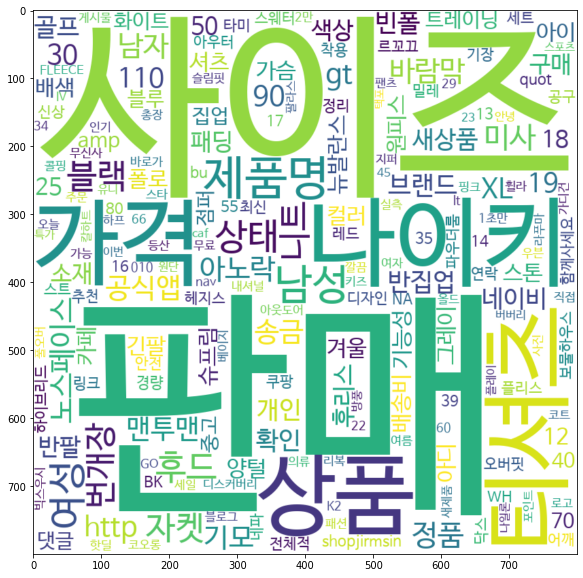

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

In [13]:
# fig.savefig('./result_img/8_Hananum-2-KRWordRank_[ZIPUP].png')